# Lanzini--Numerical Simulation Laboratory--Exercise6

In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

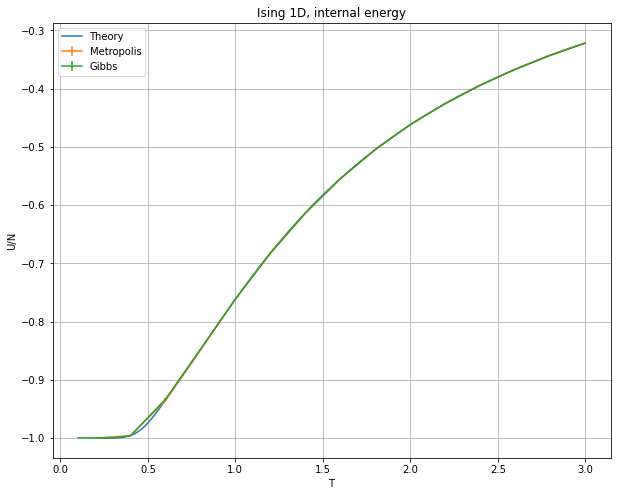

In [1]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

res_u=open("results_u.txt", "r")
gibbs_u=open("Gibbs_u.txt", "r")

temp, u_metro, um_error =np.loadtxt("results_u.txt",  usecols=(0, 1, 2), delimiter=' ', unpack='true')
temp_g, gibbs_u, gibbsu_error =np.loadtxt("Gibbs_u.txt",  usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.figure(figsize=(10, 8))
plt.plot(T, e, label='Theory')
plt.errorbar(temp, u_metro, um_error, label='Metropolis')
plt.errorbar(temp_g, gibbs_u, gibbsu_error, label='Gibbs')
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.grid(True)
plt.show()

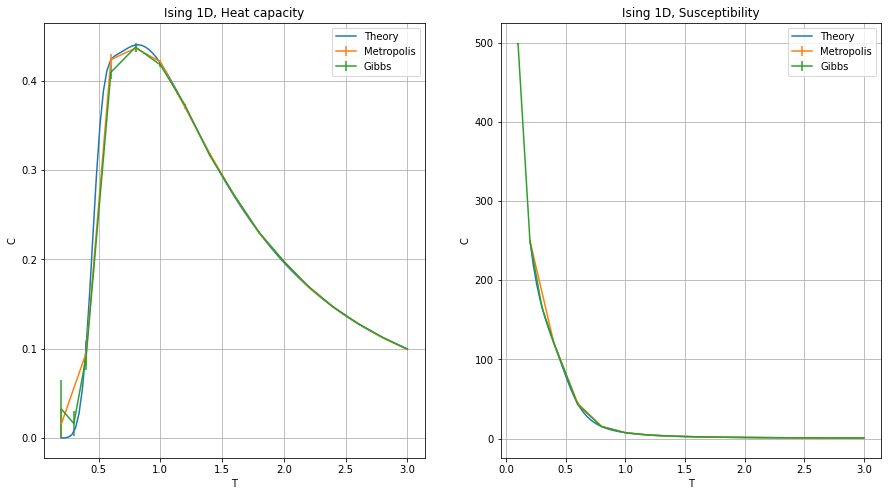

In [2]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2) #Theoretical heat capacity

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

res_c=open("results_c.txt", "r")
gibbs_c=open("Gibbs_c.txt", "r")

temp, c_metro, c_error =np.loadtxt("results_c.txt",  usecols=(0, 1, 2), delimiter=' ', unpack='true')
temp_g, gibbs_c, gibbsc_error =np.loadtxt("Gibbs_c.txt",  usecols=(0, 1, 2), delimiter=' ', unpack='true')

ax1.plot(T, heat, label='Theory')
ax1.errorbar(temp, c_metro, c_error, label='Metropolis')
ax1.errorbar(temp_g, gibbs_c, gibbsc_error, label='Gibbs')
ax1.set_title('Ising 1D, Heat capacity')
ax1.set_xlabel('T')
ax1.set_ylabel('C')
ax1.grid(True)
ax1.legend()

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN) #Theoretical susceptibility

res_x=open("results_x.txt", "r")
gibbs_x=open("Gibbs_x.txt", "r")

temp, x_metro, x_error =np.loadtxt("results_x.txt",  usecols=(0, 1, 2), delimiter=' ', unpack='true')
temp_g, gibbs_x, gibbsx_error =np.loadtxt("Gibbs_x.txt",  usecols=(0, 1, 2), delimiter=' ', unpack='true')


ax2.plot(T, X, label='Theory')
ax2.errorbar(temp, x_metro, x_error, label='Metropolis')
ax2.errorbar(temp_g, gibbs_x, gibbsx_error, label='Gibbs')
ax2.set_title('Ising 1D, Susceptibility')
ax2.set_xlabel('T')
ax2.set_ylabel('C')
ax2.grid(True)
ax2.legend()


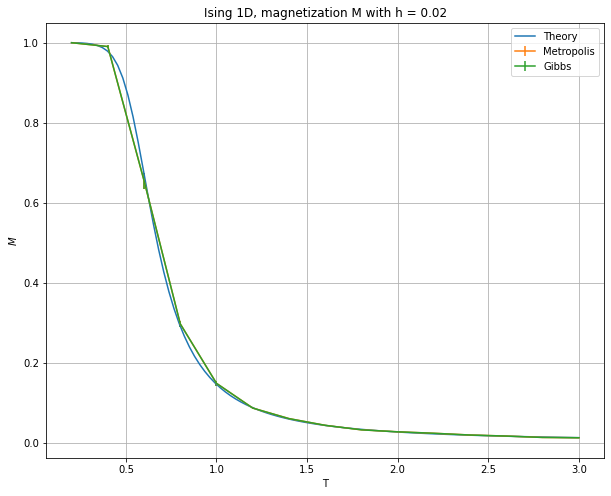

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

res_m=open("results_m.txt", "r")
gibbs_m=open("Gibbs_m.txt", "r")

temp, m_metro, mm_error =np.loadtxt("results_m.txt",  usecols=(0, 1, 2), delimiter=' ', unpack='true')
temp_g, gibbs_m, gibbsm_error =np.loadtxt("Gibbs_m.txt",  usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.figure(figsize=(10, 8))
plt.grid(True)
plt.plot(T, M, label='Theory')
plt.errorbar(temp, m_metro, mm_error, label='Metropolis')
plt.errorbar(temp, m_metro, mm_error, label='Gibbs')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend()
plt.show()